# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load four `pandas` `DataFrame` objects: `shampoo`,`housing`, `airline`, and `airline_series`.
Each of these is used in Makridakis Chapter 3. 

In [51]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16



!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')



!pip install -U statsmodels

from statsmodels.nonparametric.smoothers_lowess import lowess

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   5428      0 --:--:-- --:--:-- --:--:--  5352
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   6353      0 --:--:-- --:--:-- --:--:--     0-:--:-- --:--:--  6353
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  51560      0 --:--:-- --:--:-- --:--:-- 51560
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   5181      0 --:--:-- --:--:-- --:--:--  5181
  % Total    % Received % Xfer

# Inspecting the Data

We'll start off by taking a look at the `shampoo` data with a simple time series plot

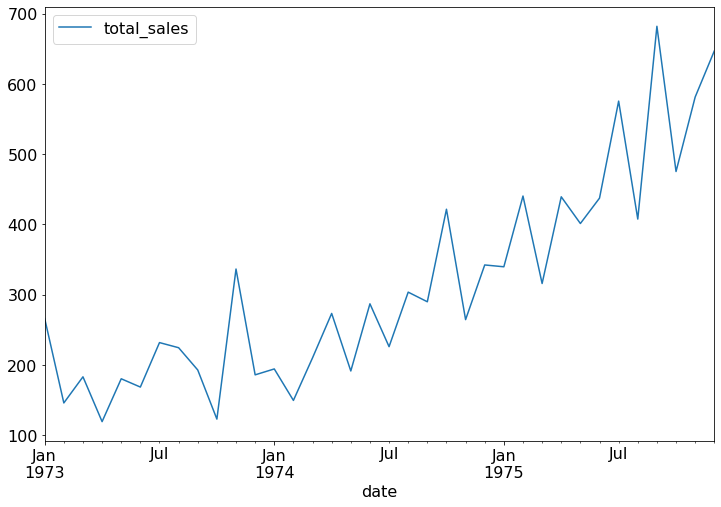

In [52]:
shampoo.plot()

# LOWESS: Locally Weighted Scatterplot Smoothing
The python `statsmodels` package contains an implementation of [LOWESS](http://home.eng.iastate.edu/~shermanp/STAT447/Lectures/Cleveland%20paper.pdf), which can be thought of as a univariate precursor to LOESS (on converserly, LOESS a multidimensional generalization of LOWESS).  

The `lowess` function from `statsmodels` takes the following input variables:

* **`endog`**: The y-values of the observed points
* **`exog`**: The x-values of the observed points
* **`frac`**: The fraction of the data (0,1] used when estimating each y-value
* **`it`**: The number of smoothing iterations to run
* **`return_sorted`**: If `True` (default), then the returned array is sorted by exog and has missing (nan or infinite) observations removed. If `False`, then the returned array is in the same length and the same sequence of observations as the input array.


For our purposes, we'll usually want to set the `endog` as the column that we would like to smooth, `exog` as the _index_ of our `pandas` `DataFrame`, and `return_sorted=False` so we're returned values that are the same shape as our input values. 

The value of `frac` is then used to control how much smoothing is applied. 

See below for an example. 

Text(0.5, 1.0, 'LOWESS with 23 points per regression')

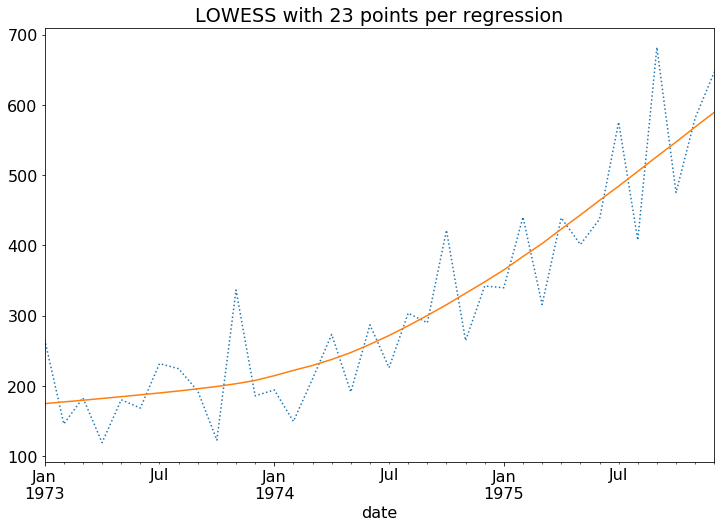

In [57]:
frac = 0.66
n_points = shampoo.shape[0]*frac

smoothed = lowess(shampoo['total_sales'], shampoo.index, frac=frac, return_sorted=False)
shampoo['smoothed'] = smoothed

shampoo['total_sales'].plot(linestyle='dotted')
shampoo['smoothed'].plot()

plt.title(f"LOWESS with {int(n_points)} points per regression")

Text(0.5, 1.0, 'LOWESS with 5 points per regression')

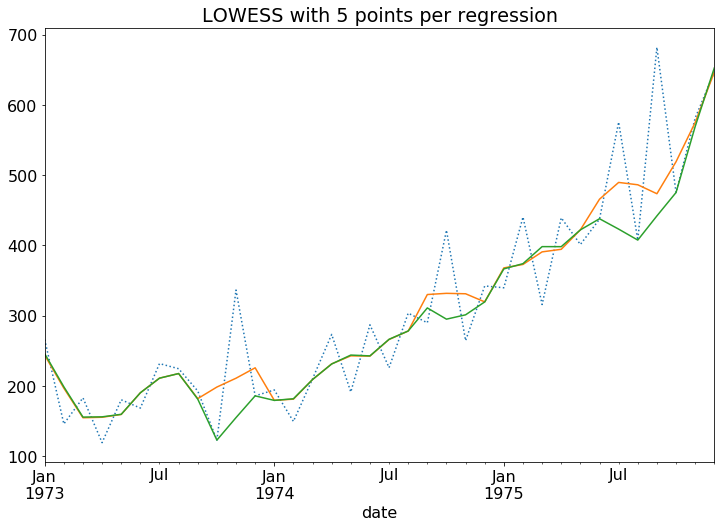

In [61]:
frac = 0.15
n_points = shampoo.shape[0]*frac

smoothed = lowess(shampoo['total_sales'], shampoo.index, frac=frac, return_sorted=False)
shampoo['3 iterations'] = smoothed

smoothed = lowess(shampoo['total_sales'], shampoo.index, frac=frac, return_sorted=False, it=10)
shampoo['10 iterations'] = smoothed

shampoo['total_sales'].plot(linestyle='dotted')
shampoo['3 iterations'].plot()
shampoo['10 iterations'].plot()

plt.title(f"LOWESS with {int(n_points)} points per regression")